In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [17]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [13]:
from attila.util.config import get_env
from attila.util.plots import plot_history, plot_preds, get_figa
from attila.util.io import load_pickle, append_rows2text, load_json, get_summary, dirs, stuff2pickle
from attila.nn.metrics import mean_IoU, DSC
from attila.experiments.tools import runs2tex
from attila.data.transform import normalize_transformation

In [4]:
_here = Path('.').resolve()

In [5]:
config, data_path, out_path, models_config_path = get_env(_here)

In [6]:
config.set('training', 'batch size', '4')
config.set('training', 'epochs', '50')
config.set('data', 'aug', 'False')

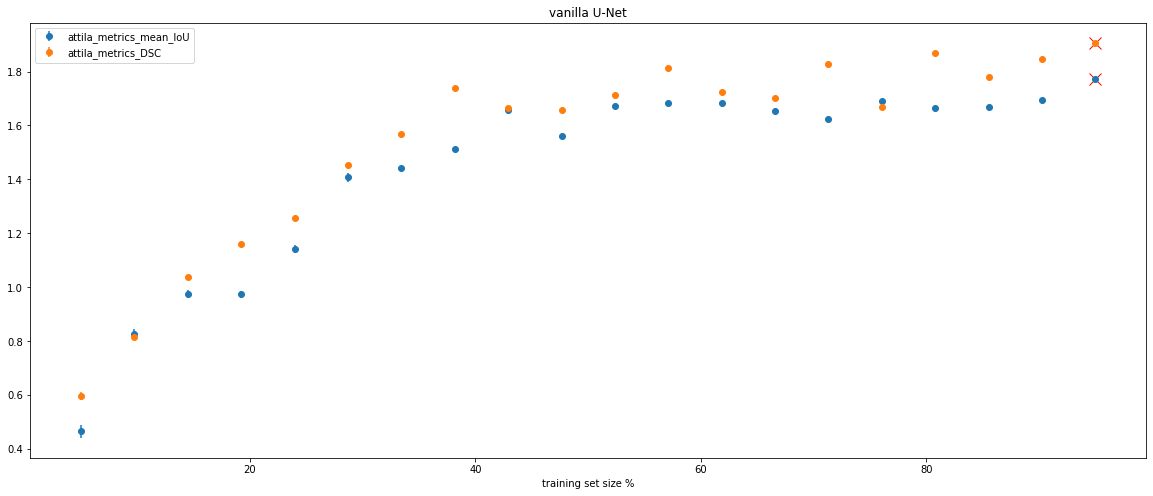

In [64]:
get_figa(1, 1)

metrics = [
    {
        'name': 'attila_metrics_mean_IoU',
        'callback': mean_IoU(get_batch_mean=False)
    },
    {
        'name': 'attila_metrics_DSC',
        'callback': DSC(get_batch_mean=False)
    }
]

results = load_pickle('results/no-aug.pkl')

# folders = dirs(out_path / 'trials' / 'to-aug-or-not')
# no_aug_folders = filter(lambda f: f.name.startswith('no-aug'), folders)
# aug_folders = filter(lambda f: f.name.startswith('aug'), folders)

# for folder in no_aug_folders:
#     summary = get_summary(folder, config)

for m in metrics:
    key = m['name']
    n_images = np.linspace(95, 5, len(results[key]['mean']))
    vals = results[key]['mean']
    
    plt.errorbar(
        n_images,
        vals,
        yerr=results[key]['std'],
        fmt='o',
        label=key
    )
    plt.plot(n_images[np.argmax(vals)], np.max(vals), marker='x', color='r', markersize=12)

plt.xlabel('training set size %')
plt.title('vanilla U-Net')
plt.legend()

stuff2pickle(results, 'results/no-aug.pkl')